In [1]:
from pathlib import Path

import imagededup

In [2]:
image_dir = Path('../tests/data/mixed_images')

# Hashing

#### Find duplicates using Perceptual hashing along with scores

In [3]:
from imagededup.methods import PHash

phasher = PHash()
duplicates = phasher.find_duplicates(image_dir=image_dir, scores=True)

Start: Calculating hashes...


  0%|          | 0/6 [00:00<?, ?it/s]2019-10-01 19:01:38,644: WARNING Invalid image file /Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file PosixPath('/Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg')
100%|██████████| 6/6 [00:00<00:00, 92.22it/s]

End: Calculating hashes!
Start: Evaluating hamming distances for getting duplicates
Start: Retrieving duplicates using BKTree algorithm



100%|██████████| 5/5 [00:00<00:00, 4806.67it/s]


End: Retrieving duplicates using BKTree algorithm
End: Evaluating hamming distances for getting duplicates


In [4]:
duplicates

{'ukbench00120_resize.jpg': [('ukbench00120.jpg', 0)],
 'ukbench00120_rotation.jpg': [],
 'ukbench00120.jpg': [('ukbench00120_resize.jpg', 0)],
 'ukbench00120_hflip.jpg': [],
 'ukbench09268.jpg': []}

### Plotting duplicates for image file: 'ukbench00120.jpg'

/Users/tanuj.jain/Documents/image-dedup/imagededup/utils/plotter.py:66: UserWarning: tight_layout : falling back to Agg renderer
  gs.tight_layout(fig)


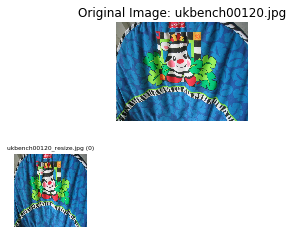

In [5]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates, filename='ukbench00120.jpg')

#### Find duplicates to remove using Perceptual hashing

In [6]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir)

Start: Calculating hashes...


  0%|          | 0/6 [00:00<?, ?it/s]2019-10-01 19:01:39,199: WARNING Invalid image file /Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file PosixPath('/Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg')
100%|██████████| 6/6 [00:00<00:00, 140.34it/s]

End: Calculating hashes!
Start: Evaluating hamming distances for getting duplicates
Start: Retrieving duplicates using BKTree algorithm



100%|██████████| 5/5 [00:00<00:00, 9562.94it/s]


End: Retrieving duplicates using BKTree algorithm
End: Evaluating hamming distances for getting duplicates


In [7]:
duplicates_list

['ukbench00120.jpg']

# CNN

#### Find duplicates using CNN along with scores

In [8]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_cnn = cnn_encoder.find_duplicates(image_dir=image_dir, scores=True)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


2019-10-01 19:01:45,116: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
2019-10-01 19:01:45,117: INFO Start: Image encoding generation
2019-10-01 19:01:45,233: WARNING Invalid image file /Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file PosixPath('/Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg')
2019-10-01 19:01:45,412: WARNING Invalid image file /Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file PosixPath('/Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg')


1/1 [==============================] - 1s 595ms/step


2019-10-01 19:01:45,752: INFO End: Image encoding generation
2019-10-01 19:01:45,755: INFO Start: Calculating cosine similarities...
2019-10-01 19:01:45,756: INFO End: Calculating cosine similarities.


In [9]:
duplicates_cnn

{'ukbench00120.jpg': [('ukbench00120_hflip.jpg', 0.9672552),
  ('ukbench00120_resize.jpg', 0.98120844)],
 'ukbench00120_hflip.jpg': [('ukbench00120.jpg', 0.9672552),
  ('ukbench00120_resize.jpg', 0.95676106)],
 'ukbench00120_resize.jpg': [('ukbench00120.jpg', 0.98120844),
  ('ukbench00120_hflip.jpg', 0.95676106)],
 'ukbench00120_rotation.jpg': [],
 'ukbench09268.jpg': []}

### Plotting duplicates for image file: 'ukbench00120.jpg'

/Users/tanuj.jain/Documents/image-dedup/imagededup/utils/plotter.py:66: UserWarning: tight_layout : falling back to Agg renderer
  gs.tight_layout(fig)


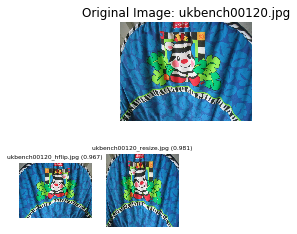

In [10]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_cnn, filename='ukbench00120.jpg')

#### Find duplicates to remove using CNN

In [11]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_list_cnn = cnn_encoder.find_duplicates_to_remove(image_dir=image_dir)

2019-10-01 19:01:49,741: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
2019-10-01 19:01:49,742: INFO Start: Image encoding generation
2019-10-01 19:01:49,825: WARNING Invalid image file /Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file PosixPath('/Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg')
2019-10-01 19:01:49,927: WARNING Invalid image file /Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg:
cannot identify image file PosixPath('/Users/tanuj.jain/Documents/image-dedup/examples/../tests/data/mixed_images/ukbench09268_corrupt.jpg')


1/1 [==============================] - 1s 670ms/step


2019-10-01 19:01:50,468: INFO End: Image encoding generation
2019-10-01 19:01:50,470: INFO Start: Calculating cosine similarities...
2019-10-01 19:01:50,471: INFO End: Calculating cosine similarities.


In [13]:
duplicates_list_cnn

['ukbench00120_hflip.jpg', 'ukbench00120_resize.jpg']